In [1]:
# email: sengtian@yahoo.com
#
# dataset:
#    1) dataset/load_prediction_train.csv
#    2) https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/?utm_source=auto-email
#
# This one use PyCaret to iterate to all available/supported models

In [2]:
%config IPCompleter.greedy=True

import pandas as pd
import os

# to display all the columns of the dataframe in the notebook
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)


In [3]:
# print version of PyCaret
from pycaret.utils import version

version()


1.0.0


In [4]:
# load the dataset
dataset_dir = 'dataset'
dataset_filename = 'loan_prediction_train.csv'

dataset_fullname = os.path.join(os.getcwd(), dataset_dir)
dataset_fullname = os.path.join(dataset_fullname, dataset_filename)

print(dataset_fullname)

# load the data and print the first few rows
df = pd.read_csv(dataset_fullname)
df.head(10)


C:\Users\SengTian\Downloads\Temp\Machine Learning\Python\Analytics_Vidhya_Loan_Prediction\dataset\loan_prediction_train.csv


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [5]:
print(df.shape)


(614, 13)


In [6]:
# drop the Loan_ID since it will not be needed in training and prediction
df = df.drop('Loan_ID', axis=1)

print(df.shape)


(614, 12)


In [7]:
# import the module and initializing setup
from pycaret.classification import *

experiment = setup(
    session_id=123,
    data=df,  
    feature_selection=True,
    train_size=0.75, 
    categorical_imputation='constant',
    categorical_features=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area'],
    numeric_imputation='median',
    numeric_features=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'],
    target='Loan_Status',
    silent=True
)


 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Binary
2,Label Encoded,"N: 0, Y: 1"
3,Original Data,"(614, 12)"
4,Missing Values,True
5,Numeric Features,4
6,Categorical Features,7
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [8]:
compare_models(blacklist=[], turbo=False)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Ridge Classifier,0.819600,0.000000,0.977800,0.804800,0.882400,0.508700
1,Linear Discriminant Analysis,0.819600,0.752700,0.977800,0.804800,0.882400,0.508700
2,Logistic Regression,0.815200,0.764300,0.958900,0.810400,0.877600,0.508600
3,CatBoost Classifier,0.808700,0.762100,0.949400,0.808200,0.872500,0.496300
4,Gradient Boosting Classifier,0.791300,0.750000,0.920800,0.806000,0.858800,0.462100
5,Ada Boost Classifier,0.789100,0.704700,0.914300,0.807500,0.856500,0.460300
6,Extreme Gradient Boosting,0.789100,0.750700,0.930300,0.798100,0.858700,0.449300
7,Light Gradient Boosting Machine,0.784800,0.777700,0.889100,0.816800,0.850700,0.463400
8,Naive Bayes,0.782600,0.731000,0.917700,0.799100,0.853100,0.438400
9,Extra Trees Classifier,0.771700,0.723000,0.883000,0.805100,0.840900,0.435700


In [9]:
# from the above, Ridge and Linear Discriminant Analysis are of the same accuracy

# Ridge Classifier

In [10]:
ridge = create_model('ridge')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8913,0.0,1.0000,0.8649,0.9275,0.7146
1,0.8043,0.0,1.0000,0.7805,0.8767,0.4360
2,0.7609,0.0,0.9688,0.7561,0.8493,0.3106
3,0.7826,0.0,1.0000,0.7619,0.8649,0.3575
4,0.7826,0.0,0.9688,0.7750,0.8611,0.3883
5,0.8043,0.0,0.9375,0.8108,0.8696,0.4864
6,0.8261,0.0,0.9677,0.8108,0.8824,0.5588
7,0.8478,0.0,0.9677,0.8333,0.8955,0.6212
8,0.7826,0.0,0.9677,0.7692,0.8571,0.4264
9,0.9130,0.0,1.0000,0.8857,0.9394,0.7875


In [11]:
tuned_ridge = tune_model('ridge')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8913,0.0,1.0000,0.8649,0.9275,0.7146
1,0.8043,0.0,1.0000,0.7805,0.8767,0.4360
2,0.7609,0.0,0.9688,0.7561,0.8493,0.3106
3,0.7826,0.0,1.0000,0.7619,0.8649,0.3575
4,0.7826,0.0,0.9688,0.7750,0.8611,0.3883
5,0.8043,0.0,0.9375,0.8108,0.8696,0.4864
6,0.8261,0.0,0.9677,0.8108,0.8824,0.5588
7,0.8478,0.0,0.9677,0.8333,0.8955,0.6212
8,0.7826,0.0,0.9677,0.7692,0.8571,0.4264
9,0.9130,0.0,1.0000,0.8857,0.9394,0.7875


In [12]:
predict_model(tuned_ridge)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Ridge Classifier,0.7857,0,1.0,0.7626,0.8653,0.3849


,Credit_History_1.0,LoanAmount,Gender_nan,Self_Employed_nan,Dependents_0,Property_Area_Semiurban,Dependents_2,Married_No,ApplicantIncome,Married_Yes,...,Dependents_nan,CoapplicantIncome,Education_Not Graduate,Loan_Amount_Term,Dependents_3+,Property_Area_Rural,Gender_Female,Dependents_1,Loan_Status,Label
0,0.0,60.0,0.0,0.0,1.0,0.0,0.0,0.0,2221.0,1.0,...,0.0,0.0,0.0,360.0,0.0,0.0,0.0,0.0,0,0
1,1.0,315.0,0.0,0.0,0.0,0.0,0.0,0.0,5955.0,1.0,...,0.0,5625.0,0.0,360.0,0.0,0.0,0.0,1.0,1,1
2,1.0,214.0,0.0,0.0,1.0,1.0,0.0,1.0,10000.0,0.0,...,0.0,0.0,0.0,360.0,0.0,0.0,1.0,0.0,0,1
3,1.0,600.0,0.0,0.0,0.0,1.0,0.0,0.0,19484.0,1.0,...,0.0,0.0,0.0,360.0,0.0,0.0,1.0,1.0,1,1
4,1.0,112.0,0.0,0.0,0.0,0.0,0.0,1.0,3812.0,0.0,...,0.0,0.0,0.0,360.0,0.0,1.0,1.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,1.0,110.0,0.0,0.0,1.0,1.0,0.0,1.0,3748.0,0.0,...,0.0,1668.0,1.0,360.0,0.0,0.0,0.0,0.0,1,1
150,1.0,182.0,0.0,0.0,1.0,0.0,0.0,0.0,3707.0,1.0,...,0.0,3166.0,0.0,360.0,0.0,1.0,0.0,0.0,1,1
151,1.0,160.0,0.0,0.0,1.0,0.0,0.0,0.0,6033.0,1.0,...,0.0,0.0,1.0,360.0,0.0,0.0,0.0,0.0,0,1
152,1.0,130.0,0.0,0.0,0.0,0.0,0.0,0.0,8750.0,1.0,...,0.0,4996.0,0.0,360.0,1.0,1.0,0.0,0.0,1,1


# Linear Discriminant Analysis

In [13]:
lda = create_model('lda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8913,0.8438,1.0000,0.8649,0.9275,0.7146
1,0.8043,0.8415,1.0000,0.7805,0.8767,0.4360
2,0.7609,0.6384,0.9688,0.7561,0.8493,0.3106
3,0.7826,0.6786,1.0000,0.7619,0.8649,0.3575
4,0.7826,0.6629,0.9688,0.7750,0.8611,0.3883
5,0.8043,0.7522,0.9375,0.8108,0.8696,0.4864
6,0.8261,0.7548,0.9677,0.8108,0.8824,0.5588
7,0.8478,0.7763,0.9677,0.8333,0.8955,0.6212
8,0.7826,0.7097,0.9677,0.7692,0.8571,0.4264
9,0.9130,0.8688,1.0000,0.8857,0.9394,0.7875


In [14]:
tuned_lda = tune_model('lda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.6957,0.6451,1.0,0.6957,0.8205,0.0
1,0.6957,0.5312,1.0,0.6957,0.8205,0.0
2,0.6957,0.4509,1.0,0.6957,0.8205,0.0
3,0.6957,0.3415,1.0,0.6957,0.8205,0.0
4,0.6957,0.3571,1.0,0.6957,0.8205,0.0
5,0.6957,0.4754,1.0,0.6957,0.8205,0.0
6,0.6739,0.4688,1.0,0.6739,0.8052,0.0
7,0.6739,0.3634,1.0,0.6739,0.8052,0.0
8,0.6739,0.4151,1.0,0.6739,0.8052,0.0
9,0.6739,0.5247,1.0,0.6739,0.8052,0.0


In [15]:
predict_model(tuned_lda)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Linear Discriminant Analysis,0.6948,0.4591,1.0,0.6928,0.8185,0.0285


,Credit_History_1.0,LoanAmount,Gender_nan,Self_Employed_nan,Dependents_0,Property_Area_Semiurban,Dependents_2,Married_No,ApplicantIncome,Married_Yes,...,CoapplicantIncome,Education_Not Graduate,Loan_Amount_Term,Dependents_3+,Property_Area_Rural,Gender_Female,Dependents_1,Loan_Status,Label,Score
0,0.0,60.0,0.0,0.0,1.0,0.0,0.0,0.0,2221.0,1.0,...,0.0,0.0,360.0,0.0,0.0,0.0,0.0,0,1,0.6834
1,1.0,315.0,0.0,0.0,0.0,0.0,0.0,0.0,5955.0,1.0,...,5625.0,0.0,360.0,0.0,0.0,0.0,1.0,1,1,0.6628
2,1.0,214.0,0.0,0.0,1.0,1.0,0.0,1.0,10000.0,0.0,...,0.0,0.0,360.0,0.0,0.0,1.0,0.0,0,1,0.7081
3,1.0,600.0,0.0,0.0,0.0,1.0,0.0,0.0,19484.0,1.0,...,0.0,0.0,360.0,0.0,0.0,1.0,1.0,1,1,0.7307
4,1.0,112.0,0.0,0.0,0.0,0.0,0.0,1.0,3812.0,0.0,...,0.0,0.0,360.0,0.0,1.0,1.0,1.0,1,1,0.6880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,1.0,110.0,0.0,0.0,1.0,1.0,0.0,1.0,3748.0,0.0,...,1668.0,1.0,360.0,0.0,0.0,0.0,0.0,1,1,0.6800
150,1.0,182.0,0.0,0.0,1.0,0.0,0.0,0.0,3707.0,1.0,...,3166.0,0.0,360.0,0.0,1.0,0.0,0.0,1,1,0.6703
151,1.0,160.0,0.0,0.0,1.0,0.0,0.0,0.0,6033.0,1.0,...,0.0,1.0,360.0,0.0,0.0,0.0,0.0,0,1,0.6950
152,1.0,130.0,0.0,0.0,0.0,0.0,0.0,0.0,8750.0,1.0,...,4996.0,0.0,360.0,1.0,1.0,0.0,0.0,1,1,0.6829


In [16]:
# Ridge Classifier has a higher score than Linear Discriminant Analysis

# Predict on Unseen Data

In [17]:
# load the dataset
dataset_dir = 'dataset'
dataset_filename = 'loan_prediction_test.csv'

dataset_fullname = os.path.join(os.getcwd(), dataset_dir)
dataset_fullname = os.path.join(dataset_fullname, dataset_filename)

print(dataset_fullname)

# load the data and print the first few rows
t_df = pd.read_csv(dataset_fullname)
t_df.head(10)


C:\Users\SengTian\Downloads\Temp\Machine Learning\Python\Analytics_Vidhya_Loan_Prediction\dataset\loan_prediction_test.csv


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban


In [18]:
unseen_predictions = predict_model(tuned_ridge, data=t_df)
unseen_predictions.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Label
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,1
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,1
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,1
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,1
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,1
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban,1
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban,1
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural,0
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban,1
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban,1


In [19]:
unseen_predictions = unseen_predictions.rename(columns={'Label': 'Loan_Status'})
unseen_predictions.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,1
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,1
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,1
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,1
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,1
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban,1
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban,1
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural,0
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban,1
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban,1


In [20]:
unseen_predictions['Loan_Status'] = unseen_predictions['Loan_Status'].map({1: 'Y', 0: 'N'})
unseen_predictions.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,Y
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,Y
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,Y
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,Y
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,Y
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban,Y
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban,Y
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural,N
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban,Y
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban,Y


In [21]:
save_unseen_predictions = unseen_predictions.filter(['Loan_ID', 'Loan_Status'])
save_unseen_predictions.head(10)

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
5,LP001054,Y
6,LP001055,Y
7,LP001056,N
8,LP001059,Y
9,LP001067,Y


In [22]:
t_dataset_dir = 'dataset'
t_dataset_filename = 'loan_prediction_submission_pycaret.csv'

t_dataset_fullname = os.path.join(os.getcwd(), dataset_dir)
t_dataset_fullname = os.path.join(t_dataset_fullname, t_dataset_filename)
save_unseen_predictions.to_csv(t_dataset_fullname, index=False)

print('Prediction result is written to:\n{}'.format(t_dataset_fullname))

Prediction result is written to:
C:\Users\SengTian\Downloads\Temp\Machine Learning\Python\Analytics_Vidhya_Loan_Prediction\dataset\loan_prediction_submission_pycaret.csv


In [23]:
# Achieved a score of 0.7778

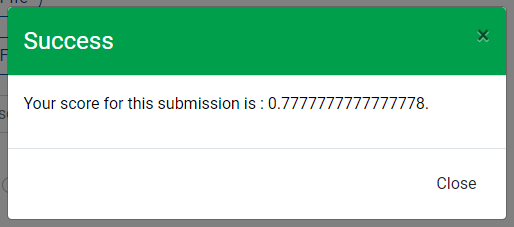